# EDA

This notebook is used for data exploration.

In [2]:
import os
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN/notebooks'

In [3]:
os.chdir('/home/ubuntu/Thesis-KNMI-FoggyGAN/')
os.getcwd()

'/home/ubuntu/Thesis-KNMI-FoggyGAN'

In [4]:
import pandas as pd

df = pd.read_pickle("data/raw/allAnnotations20210422_pkv4.pkl")

In [5]:
df

# MEANING OF DAY_PHASE LABELS

# 0;"night"
# 1;"day"
# 10;"civil dawn"
# 11;"civil dusk"
# 20;"nautical dawn"
# 21;"nautical dusk"
# 30;"astronomical dawn"
# 31;"astronomical dusk"

,filepath,label,day_phase,filename
0,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,No Fog,1,A50-HM1927-ID11542_20181102_0651.jpg
1,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,No Fog,1,A15-HM797-ID12045_20181103_0941.jpg
2,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,No Fog,1,A28-HM1982-ID13517_20181103_0801.jpg
3,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A4...,No Fog,1,A4-HM643-ID111940_20181103_0831.jpg
4,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,No Fog,1,A50-HM1838-ID11510_20181103_1011.jpg
...,...,...,...,...
36354,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,No Fog,1,A2-HM765-ID10913_20170905_1100.jpg
36355,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A4...,No Fog,11,A4-HM118-ID13975_20200121_1610.jpg
36356,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1907-ID11535_20200121_2300.jpg
36357,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,No Fog,20,A50-HM1858-ID11642_20170915_0431.jpg


In [7]:
len(os.listdir('data/raw/images_data'))

42544

In [6]:
df.groupby(['label', 'day_phase']).count()

filepath  filename
label      day_phase                    
Cannot Say 0              1798      1798
           1               571       571
           10               80        80
           11                8         8
           20              110       110
           21                5         5
           30               10        10
           31               10        10
Fog        0              1003      1003
           1               280       280
           10              114       114
           11                4         4
           20               72        72
           21                7         7
           30               10        10
           31                7         7
No Fog     0             15138     15138
           1             20156     20156
           10             1591      1591
           11               51        51
           20             1606      1606
           21               39        39
           30               90        90
           31               98        98

In [22]:
df.groupby('day_phase').count()

,filepath,label,filename
day_phase,,,
0,17939,17939,17939
1,21007,21007,21007
10,1785,1785,1785
11,63,63,63
20,1788,1788,1788
21,51,51,51
30,110,110,110
31,115,115,115


In [15]:
print(df.groupby('label').count()['filepath'].to_latex())

\begin{tabular}{lr}
\toprule
{} &  filepath \\
label      &           \\
\midrule
Cannot Say &      2592 \\
Fog        &      1497 \\
No Fog     &     38769 \\
\bottomrule
\end{tabular}



In [23]:
df[(df.label == 'Fog') & (df.day_phase == 0)]

,filepath,label,day_phase,filename
259,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A9...,Fog,0,A9-HM437-ID12850_20190316_0320.jpg
269,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A9...,Fog,0,A9-HM427-ID12855_20190316_2250.jpg
345,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A1...,Fog,0,A16-HM256-ID12261_20190321_0310.jpg
371,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A2...,Fog,0,A2-HM755-ID10910_20190322_0000.jpg
375,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1891-ID11529_20190322_0041.jpg
...,...,...,...,...
36310,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1887-ID11631_20191231_1841.jpg
36329,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A9...,Fog,0,A9-HM427-ID12855_20200121_0400.jpg
36334,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1887-ID11631_20200101_2231.jpg
36356,/nas-research.knmi.nl/sensordata/CAMERA/RWS/A5...,Fog,0,A50-HM1907-ID11535_20200121_2300.jpg


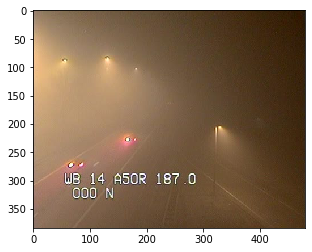

In [26]:
from matplotlib import pyplot as plt
import os

img_folder = 'data/raw/images_data/'
fnames = df[(df.label == 'Fog') & (df.day_phase == 0)].sample(3).filename.values

img_path = os.path.join(img_folder, fnames[1])
img = plt.imread(img_path)
plt.imshow(img)

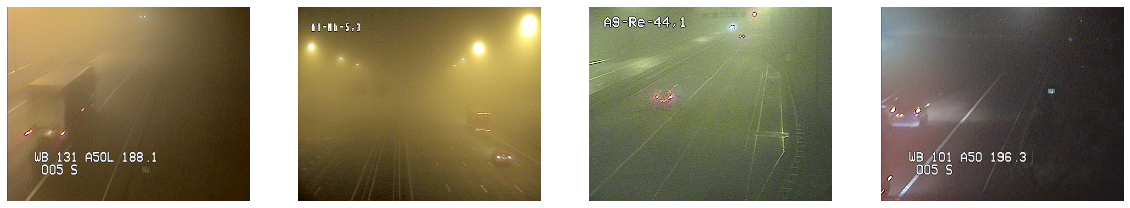

In [42]:
from matplotlib import pyplot as plt

filenames = df[(df.label == 'Fog') & (df.day_phase == 0)].sample(4, random_state=15).filename.values

rows = 1
cols = 4
axes=[]

fig = plt.figure(figsize=(20,5))

for i in range(rows*cols):
    path = os.path.join(img_folder, filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.axis('off')
    plt.imshow(img)
    plt.savefig('reports/4foggy_samples.jpg')

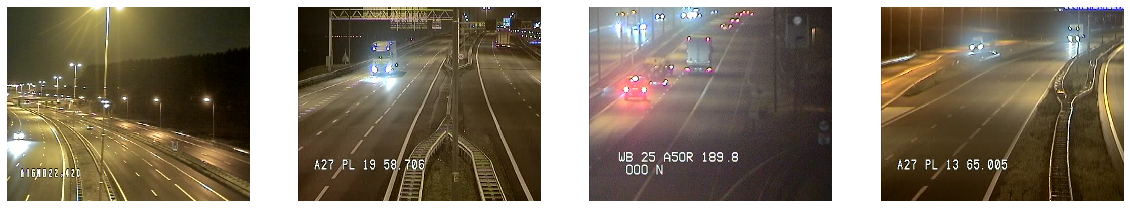

In [43]:
filenames = df[(df.label == 'No Fog') & (df.day_phase == 0)].sample(4, random_state=15).filename.values

rows = 1
cols = 4
axes=[]

fig = plt.figure(figsize=(20,5))

for i in range(rows*cols):
    path = os.path.join(img_folder, filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.axis('off')
    plt.imshow(img)
    plt.savefig('reports/4clear_samples.jpg')

array(['A16-HM224-ID12254_20180824_2350.jpg',
       'A27-HM587-ID10975_20191230_0140.jpg',
       'A50-HM1898-ID11532_20200123_1930.jpg',
       'A27-HM650-ID10969_20170913_0021.jpg',
       'A50-HM1881-ID11525_20200122_0140.jpg',
       'A1-HM52-ID12955_20200123_0310.jpg',
       'A9-HM441-ID12789_20191231_2341.jpg',
       'A50-HM1963-ID11604_20191231_0201.jpg'], dtype=object)

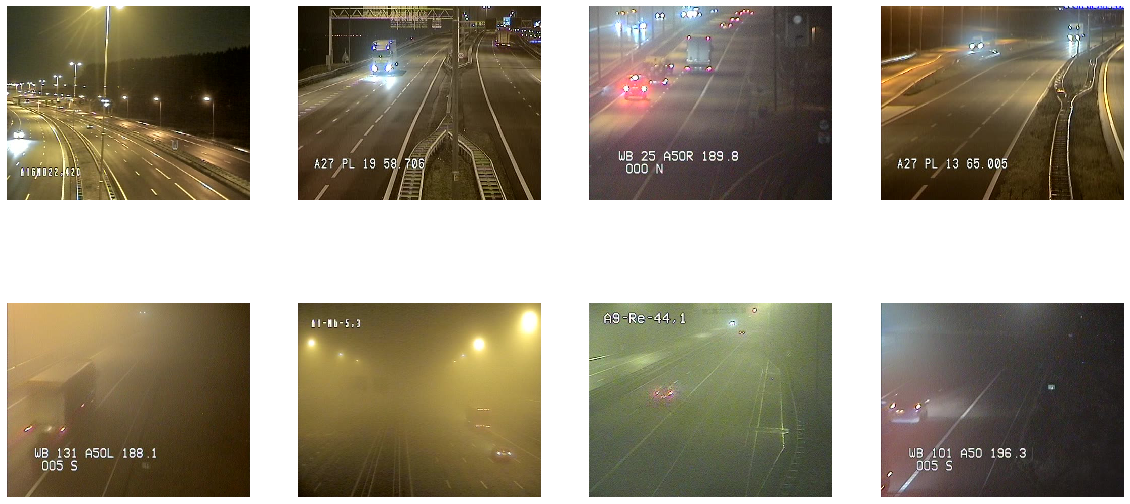

In [47]:
df1 = df[(df.label == 'No Fog') & (df.day_phase == 0)].sample(4, random_state=15)
df2 = df[(df.label == 'Fog') & (df.day_phase == 0)].sample(4, random_state=15)

df3 = pd.concat([df1, df2])

filenames = df3.filename.values

rows = 2
cols = 4
axes=[]

fig = plt.figure(figsize=(20,10))

for i in range(rows*cols):
    path = os.path.join(img_folder, filenames[i])
    img = plt.imread(path)
    axes.append(fig.add_subplot(rows, cols, i+1))
    plt.axis('off')
    plt.imshow(img)
    plt.savefig('reports/ClearAndFogSamples.jpg')

In [49]:
img = plt.imread(os.path.join(img_folder, filenames[1]))
img.shape

(384, 480, 3)